# Perceptron

## Discrete predictions and error function

Welcome to my first notebook! We will be covering a basic classification problem and explore basic concepts which will allow us to predict if a student will be accepted to university based on two variables. 

Say we have been provided with some test results based on historical observations which tell us that students with 2 test results x and y have been either accepted or not. To make the example a bit more interesting we have mixed resukts on the interfce.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

def getInput():
    data_file = './notebook_data/notebook1_data.txt'
    rows = np.genfromtxt(data_file, delimiter=',')
    return rows[:, [0, 1]], rows[:, 2]


The aim of our first toy model is to be able to predict that a student is accepted or not based on two scores. We are going to be classifying points using a discrete error function such as the Step Function which will return 1 if the test parameter is >= 0 or 0 if the value is < than 0.

In [119]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

Given a set of weight W, variables X and bias B, the prediction algorithm is going to be :

In [120]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

The function should receive as inputs the data X, the labels y, the weights W (as an array), and the bias b, update the weights and bias W, b, according to the perceptron algorithm and return W and b.

In [125]:
def perceptronStep(X, y, W, b, learn_rate):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

This function runs the perceptron algorithm repeatedly on the dataset,and returns a few of the boundary lines obtained in the iterations, for plotting purposes. Feel free to play with the learning rate and the num_epochs, and see your results plotted below.

In [139]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 2500):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


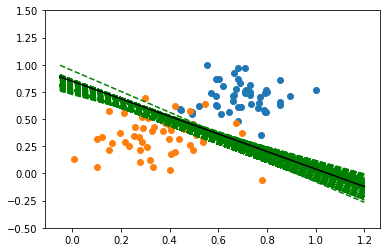

In [140]:
# Load the data
X , y = getInput()

boundary_line = trainPerceptronAlgorithm(X, y)

# This block plots the lines.(one for each epoch)
# The green dashed lines are the updated line,
# The solid black line is the final line
xi = np.arange(-0.05, 1.25, 0.25)
for i in range(0, len(boundary_line)-1):
    line = xi*boundary_line[i][0]+boundary_line[i][1]
    plt.plot(xi, line, linestyle='--', color='green')

line = xi*boundary_line[len(boundary_line)-1][0]+boundary_line[len(boundary_line)-1][1]
plt.plot(xi,line,color='black')
plt.ylim(-0.5,1.5)
X0 = X[y == 0]
X1 = X[y == 1]
plt.scatter(X0[:, 0], X0[:, 1])
plt.scatter(X1[:, 0], X1[:, 1])


plt.show()


## Continous predictions and error functions.

When sercing for the 